Assignment No 2 (Deep Learning)

**Problem Statement :-** Implementing Feedforward neural networks with Keras and TensorFlow
1. Import the necessary packages
2. Load the training and testing data (MNIST/CIFAR10)
3. Define the network architecture using Keras
4. Train the model using SGD
5. Evaluate the network
6. Plot the training loss and accuracy

In [ ]:
# A.Importing the necessary packages

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [ ]:
# B.Load the training and testing data (MNIST/CIFAR10)
# Full-Form = "Modified National Institute of Standards and Technology/Canadian Institute For Advanced Research-10"

mnist =  tf.keras.datasets.mnist            # importing MNIST Datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data() # Spliting the data into training and testing


# Converting the value range from 0 to 255  ===== 0 to 1          ***---  0 to 255/255 = 1 ---****
x_train =  x_train/255
x_test = x_test/255

# Because to get the value rage from the 0 to 1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# C.Define the network architecture using Keras

# Network Build  - input layer , hidden layer , Output layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10 , activation = "softmax")
])

model.summary();

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# D.Train the model using SGD
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics = ['accuracy'])

history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7212 - loss: 1.0708 - val_accuracy: 0.9043 - val_loss: 0.3580
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9025 - loss: 0.3547 - val_accuracy: 0.9186 - val_loss: 0.2934
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9174 - loss: 0.2930 - val_accuracy: 0.9260 - val_loss: 0.2644


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9148 - loss: 0.3034
Loss = 0.264
Accuracy = 0.926


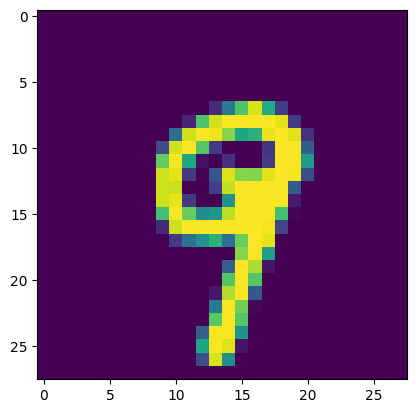

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


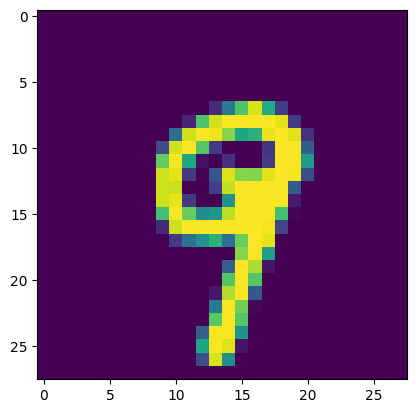

Predicted Value: [2.5179238e-06 1.6535159e-05 2.9636085e-05 4.7369310e-04 1.3585657e-02
 4.0737497e-05 5.6033750e-06 2.3973934e-02 1.7475772e-03 9.6012414e-01]


In [ ]:
# E.Evaluate the Network
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" % test_loss)
print("Accuracy = %.3f" % test_acc)

n =random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print('Predicted Value:' , predicted_value[n])

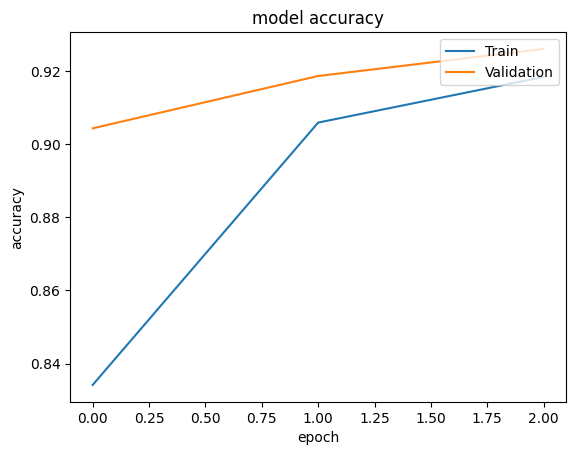

In [ ]:
# F. Plot the training Loss and Accuracy ->

# Plotting the Training Accuracy ;-

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.show()

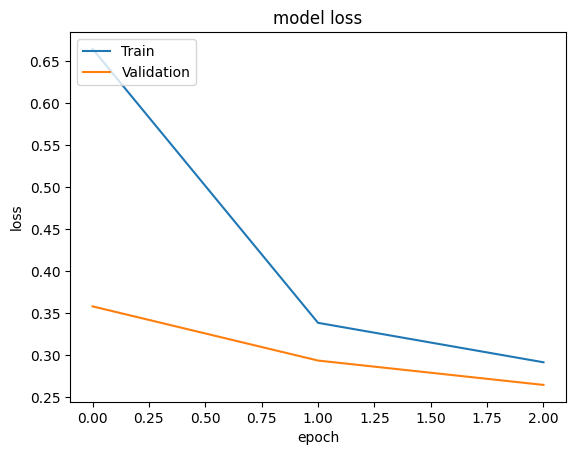

In [ ]:
# Plotting the Training Loss :-

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

